<h1>Extracting Stock Data Using a Python Library</h1>


<p>I will hypothetically work as a data analyst for a hedge fund; my job is to determine any suspicious stock activity. I will extract stock data using a Python library. I will use the <coode>yfinance</code> library, it allows us to extract data for stocks returning data in a pandas dataframe.</p>


In [1]:
# !pip install yfinance==0.1.67
#!pip install pandas==1.3.3

In [17]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Using the yfinance Library to Extract Stock Data


I will use the Ticker module and create an object that will allow me to access functions to extract data. 

In [18]:
Advanced_Micro_Devices = yf.Ticker("AMD")

In [19]:
AMD_info=Advanced_Micro_Devices.info
AMD_info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

I can get the any values from this dictionary using the key:


In [20]:
AMD_info['averageVolume']

82509447

### Extracting Share Price


I will use the history() method to get the share price of the stock over a certain period of time. 

Specifing the period parameter I can set how far back from the present to get data (the options for period are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max)


Then the format that the data is returned in is a Pandas DataFrame. 

In [21]:
Advanced_Micro_Devices_data = Advanced_Micro_Devices.history(period="max")
Advanced_Micro_Devices_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,0.000000,3.302083,3.125000,3.145833,219600,0,0.0
1980-03-18 00:00:00-05:00,0.000000,3.125000,2.937500,3.031250,727200,0,0.0
1980-03-19 00:00:00-05:00,0.000000,3.083333,3.020833,3.041667,295200,0,0.0
1980-03-20 00:00:00-05:00,0.000000,3.062500,3.010417,3.010417,159600,0,0.0
1980-03-21 00:00:00-05:00,0.000000,3.020833,2.906250,2.916667,130800,0,0.0
...,...,...,...,...,...,...,...
2022-12-02 00:00:00-05:00,75.050003,76.279999,73.650002,74.980003,64325200,0,0.0
2022-12-05 00:00:00-05:00,74.540001,75.169998,72.820000,73.620003,47022200,0,0.0
2022-12-06 00:00:00-05:00,73.080002,73.389999,69.400002,70.269997,64965200,0,0.0


I can also set a different period:

In [22]:
Advanced_Micro_Devices_data_1month = Advanced_Micro_Devices.history(period="1mo")
Advanced_Micro_Devices_data_1month.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-11-09 00:00:00-05:00,62.279999,63.049999,59.799999,59.919998,62940300,0,0
2022-11-10 00:00:00-05:00,64.300003,68.800003,63.619999,68.470001,107996300,0,0
2022-11-11 00:00:00-05:00,69.580002,73.320000,68.290001,72.370003,111709500,0,0
2022-11-14 00:00:00-05:00,75.220001,75.250000,72.669998,73.529999,108892800,0,0
2022-11-15 00:00:00-05:00,77.260002,79.160004,75.389999,76.370003,108946300,0,0


I will go on with the max period:


In [23]:
Advanced_Micro_Devices_data.reset_index(inplace=True)

I will plot the Open price against the Date:


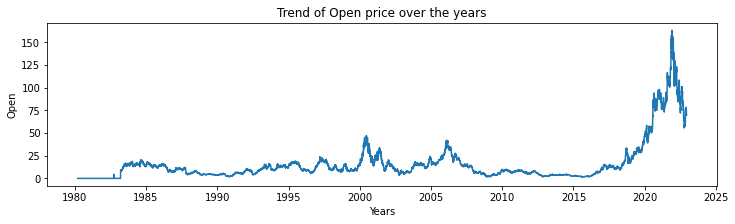

In [24]:
fig, axes = plt.subplots(figsize=(12,3)) 

# Now use the axes object to add stuff to plot
axes.plot(Advanced_Micro_Devices_data["Date"], Advanced_Micro_Devices_data["Open"])
axes.set_xlabel('Years')
axes.set_ylabel('Open')
axes.set_title('Trend of Open price over the years');


### Extracting CashFlow


In [43]:
AMD_div=Advanced_Micro_Devices.cashflow.T
AMD_div

,Investments,Change To Liabilities,Total Cashflows From Investing Activities,Total Cash From Financing Activities,Change To Operating Activities,Issuance Of Stock,Net Income,Change In Cash,Repurchase Of Stock,Total Cash From Operating Activities,Depreciation,Other Cashflows From Investing Activities,Change To Inventory,Change To Account Receivables,Change To Netincome,Capital Expenditures,Other Cashflows From Financing Activities,Net Borrowings
,,,,,,,,,,,,,,,,,,
2021-12-25,-378000000.0,801000000.0,-686000000.0,-1.895000e+09,-379000000.0,104000000.0,3.162000e+09,940000000.0,-1.999000e+09,3.521000e+09,463000000.0,-7000000.0,-556000000.0,-640000000.0,665000000.0,-301000000.0,NaN,NaN
2020-12-26,-658000000.0,-513000000.0,-952000000.0,6.000000e+06,218000000.0,85000000.0,2.490000e+09,125000000.0,-7.800000e+07,1.071000e+09,354000000.0,-7000000.0,-417000000.0,-219000000.0,-856000000.0,-294000000.0,-1000000.0,NaN
2019-12-28,41000000.0,153000000.0,-149000000.0,4.300000e+07,65000000.0,523000000.0,3.410000e+08,387000000.0,-6.000000e+06,4.930000e+08,258000000.0,27000000.0,-137000000.0,-623000000.0,406000000.0,-217000000.0,-1000000.0,-473000000.0
2018-12-29,-78000000.0,212000000.0,-170000000.0,2.800000e+07,18000000.0,70000000.0,3.370000e+08,-108000000.0,-6.000000e+06,3.400000e+07,170000000.0,71000000.0,-151000000.0,-806000000.0,216000000.0,-163000000.0,5000000.0,-41000000.0


I will plot the dividends overtime:


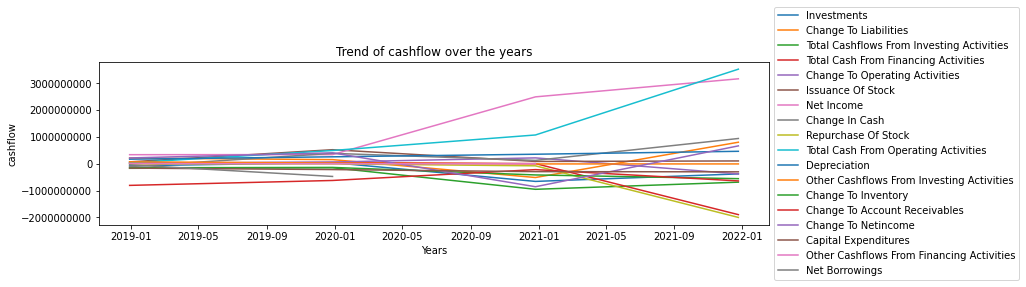

In [50]:
fig, axes = plt.subplots(figsize=(12,3)) 


axes.plot(AMD_div)
axes.set_xlabel('Years')
axes.set_ylabel('cashflow')
axes.set_title('Trend of cashflow over the years');
axes.legend(AMD_div, loc='center left', bbox_to_anchor=(1.0, 0.5)) 
axes.ticklabel_format(style='plain', axis='y')